In [92]:
import jieba
import jieba.analyse
import requests
import re
import time
from bs4 import BeautifulSoup
import pandas as pd
from wordcloud import WordCloud
from PIL import Image


In [81]:
url='https://www.ptt.cc/bbs/HatePolitics/index.html'
table=[]
for page in range(1,21):
    headers={'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.108 Safari/537.36'}
    r=requests.get(url, headers=headers,cookies={'over18':'1'})
    r.encoding='utf-8'
    bs=BeautifulSoup(r.text,'lxml')
    n=bs.find('div',attrs={'class':'r-list-container action-bar-margin bbs-screen'})
    dfs=[]
    for i in n:
        #print(len(i))
        if len(i)==7:
            if i.find('div',attrs={'class':'author'}).text!= '-':
                title_url=i.find('div',attrs={'class':'title'}).a['href']
                title_urls='https://www.ptt.cc/'+title_url
                #print(title_urls)
                title_r=requests.get(title_urls, headers=headers,cookies={'over18':'1'})
                title_bs=BeautifulSoup(title_r.text,'lxml')
                title=title_bs.find('div',attrs={'class':'article-metaline'}).text
                userid=[]
                content=[]
                ip=[]
                date=[]
                article=[]
                dicts={}

                for push in title_bs.find_all('div',attrs={'class':'push'}):
                    p_userid=push.find(class_='f3 hl push-userid').text
                    p_content=push.find(class_='f3 push-content').text.replace(': ','')
                    #print(p_content)
                    p_ipdate=push.find(class_='push-ipdatetime').text
                    #print(p_ipdate)
                    p_ip=re.compile('[0-9]+\.[0-9]+\.[0-9]+\.[0-9]+\ ').search(str(p_ipdate))
                    if  not p_ip ==None:
                        p_ip=re.compile('[0-9]+\.[0-9]+\.[0-9]+\.[0-9]+\ ').search(str(p_ipdate)).group()
                        p_date=re.compile('[0-9]+\/[0-9]+\ [0-9]+\:[0-9]+').search(str(p_ipdate)).group()
                    p_article=title_bs.find_all('div', attrs={'class':'article-metaline'})[1].find(class_='article-meta-value').text
                    userid.append(p_userid)
                    content.append(p_content)
                    ip.append(p_ip)
                    date.append(p_date)
                    article.append(p_article)
       
                dicts={'userid':userid,'content':content,'ip':ip,'date':date}
                df=pd.DataFrame(dicts)
                df['article']=article
                dfs.append(df)
                time.sleep(1)
        elif str(i)=='<div class="r-list-sep"></div>':
            break
    #print(len(dfs))

    for lenght in range(1,len(dfs)):
        dfs[0]=pd.concat([dfs[0],dfs[lenght]])
    #print(dfs[0])
    table.append(dfs[0])
    
    url='https://www.ptt.cc/'+bs.find('div',attrs={'class':'btn-group btn-group-paging'}).find_all('a')[1]['href']
    time.sleep(1)
for lenght in range(1,len(table)):
        table[0]=pd.concat([table[0],table[lenght]])
ptt_reply=table[0].astype(str)
print(ptt_reply)

       userid                               content                ip  \
0      goetze                               午睡睡太久了吧     36.237.78.26    
1   hiinnlive                    與其讓無能的民進黨搞爛中華民國  我    122.254.56.90    
2   hiinnlive                     寧願讓中國統一  經濟建設更快更好    122.254.56.90    
3    kterry01                      想被統一你可以回你心中祖國的懷抱     1.169.251.63    
4    kterry01                         現在不用游泳，可以買機票~     1.169.251.63    
..        ...                                   ...               ...   
0    Stigmata                      查到違建裝可憐 跟韓禿是同一類人  114.137.185.170    
1   skylove21  https://www.storm.mg/article/2291584    36.231.19.125    
2   skylove21                       看看他這種發言還有人拿3q比他    36.231.19.125    
3      goetze                            這要叫沒有歧視~~哈     114.40.17.95    
4      goetze                        噗!所以你的家教成功~~哈!     114.40.17.95    

           date                      article  
0   02/20 14:36                [討論] 政府防疫太軟爛了  
1   02/20 14:43              

In [82]:
#新增詞彙
jieba.load_userdict('/Users/louis/HatePolitics_jieba.txt')
stopWords=[]
segments=[]
remainderWords=[]
# 讀入停用詞檔
with open('stopWords.txt', 'r', encoding='UTF-8') as file:
    for data in file.readlines():
        data = data.strip()
        stopWords.append(data)

In [93]:
data=ptt_reply.groupby(by='userid').apply(lambda x:[','.join(x['content'])]).astype(str)
h_tpp={}
h_dpp={}
h_kmt={}
no_hater={}
ttp_count=0
ddp_count=0
kmt_count=0
count=0
author_count=0
for i in data:
    key_words=jieba.analyse.extract_tags(i, topK=10, withWeight=False, allowPOS=())
    if '柯糞' in key_words or '柯屁' in key_words or '柯師傅' in key_words:
        if len(key_words)==10:
            h_tpp.setdefault(data.index[author_count],key_words)
            ttp_count+=1
            


    elif '菸粉' in key_words or '817' in key_words or '菸糞' in key_words or '英糞' in key_words or '綠畜' in key_words:
         if len(key_words)==10:
            h_dpp.setdefault(data.index[author_count],key_words)
            ddp_count+=1


    elif '韓導' in key_words or '憨導' in key_words or '552' in key_words or '韓總機' in key_words or '憨粉' in key_words:
         if len(key_words)==10:
                h_kmt.setdefault(data.index[author_count],key_words)
                kmt_count+=1


    else:
        no_hater.setdefault(data.index[author_count],key_words)
        count+=1
    author_count+=1

print('柯黑人數：',ttp_count)
print('英黑人數：',ddp_count)
print('韓黑人數：',kmt_count)
print('無明顯跡象：',count)

tpp_value=[]
dpp_value=[]
kmt_value=[]
tpp_key=[]
dpp_key=[]
kmt_key=[]

#人名
for i in h_tpp.keys():
    tpp_key.append(i)
print('柯黑：',tpp_key)
for i in h_dpp.keys():
    dpp_key.append(i)
print('英黑：',dpp_key)
for i in h_kmt.keys():
    kmt_key.append(i)
print('韓黑：',kmt_key)

柯黑人數： 11
英黑人數： 21
韓黑人數： 20
無明顯跡象： 1456
柯黑： ['BuriBuri', 'LAPDSWAT456', 'chr5657', 'coober', 'jack0216', 'madeofhonor', 'meredith001', 'pinkneku', 'qwert1629', 'slimak', 'uku']
英黑： ['Tsucomi69', 'airbone0407', 'annie06045', 'antistar', 'blackdog1943', 'cl700503', 'elmoman', 'envwatch', 'hamaski3330', 'i92219', 'ivan01023', 'jason486', 'jordanlove', 'n6335097', 'nnkj', 'rustic5566', 'sc6003pc', 'sfh20230', 'somehog', 'urban01', 'yyan1218']
韓黑： ['DDRMIX', 'GameGyu', 'Moratti', 'alinalovers', 'athome1', 'berryc', 'delegate', 'fish10241', 'hauwie', 'insomniatw', 'jojoway', 'leocheng', 'lwt501cx', 's81048112', 's911150', 'shonbig', 'soong2468', 'suny921', 'turnpoint', 'webster1112']


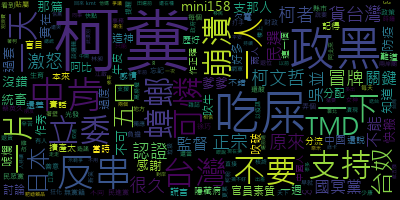

In [94]:
tpp=[]
for i in tpp_key:
    tpp.append(data[i])
text_dpp=str(tpp).replace('[','').replace('"','').replace(']','').replace("'",'').replace('\\','').replace(',','').replace(' ','')
n=jieba.cut(text_dpp, cut_all=False)
remainderWords =str(list(filter(lambda a: a not in stopWords and a != '\n', n))).replace('[','').replace(']','').replace("'",'')
cloud= WordCloud(font_path='/Users/louis/Library/Group Containers/UBF8T346G9.Office/FontCache/4/CloudFonts/TTC/78992571833.ttc').generate(remainderWords)
cloud.to_file('tpp.png')
#print(cloud)
Image.open("tpp.png")


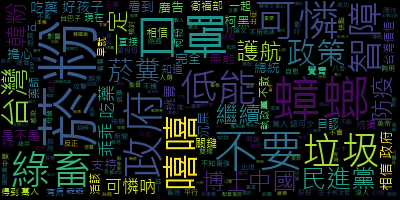

In [95]:
dpp=[]
for i in dpp_key:
    dpp.append(data[i])
text_dpp=str(dpp).replace('[','').replace('"','').replace(']','').replace("'",'').replace('\\','').replace(',','').replace(' ','')
n=jieba.cut(text_dpp, cut_all=False)
remainderWords =str(list(filter(lambda a: a not in stopWords and a != '\n', n))).replace('[','').replace(']','').replace("'",'')
cloud= WordCloud(font_path='/Users/louis/Library/Group Containers/UBF8T346G9.Office/FontCache/4/CloudFonts/TTC/78992571833.ttc').generate(remainderWords)
cloud.to_file('dpp.png')

Image.open("dpp.png")


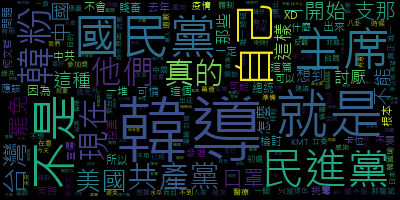

In [96]:
kmt=[]
for i in kmt_key:
    kmt.append(data[i])
text_kmt=str(kmt).replace('[','').replace('"','').replace(']','').replace("'",'')
n='|'.join(jieba.cut(text_kmt, cut_all=False))

cloud= WordCloud(font_path='/Users/louis/Library/Group Containers/UBF8T346G9.Office/FontCache/4/CloudFonts/TTC/78992571833.ttc').generate(n)
cloud.to_file('kmt.png')
Image.open("kmt.png")
